In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import cv2

def load_data(Directory):
    '''Returns: X_train, y_train, X_test, y_test. Loads data from data directory into np.arrays. Make sure, your directory is structured as the downloaded folder.
    Provide the relative path to this folder as Directory argument.'''

    X_train, y_train = [], []
    X_test, y_test = [], []

    ### load training data
    directories_training = {}
    target = 0

    for foldername in os.listdir(f'{Directory}/Training'):
        directories_training[foldername] = f'{Directory}/Training/{foldername}'

    for tumor_directory in directories_training.values():
        for filename in os.listdir(tumor_directory):
            filepath = os.path.join(tumor_directory, filename)
            picture = cv2.imread(filepath)[:,:,:1]
            picture_resized = cv2.resize(picture, (255,255))
            X_train.append(picture_resized)
            y_train.append(target)
        target += 1

    ### shuffle data
    c = list(zip(X_train, y_train))
    np.random.shuffle(c)
    X_train, y_train = zip(*c)

    ### format data to array
    X_train = np.array(X_train)
    X_train = np.expand_dims(X_train, axis=3)
    y_train = np.array(y_train)
    print(f'X_train and y_train created successfully with shapes: \n X_train:{X_train.shape}\n y_train:{y_train.shape}')

    ### load testing data
    directories_testing = {}
    target = 0

    for foldername in os.listdir(f'{Directory}/Testing'):
        directories_testing[foldername] = f'{Directory}/Testing/{foldername}'

    for tumor_directory in directories_testing.values():
        for filename in os.listdir(tumor_directory):
            filepath = os.path.join(tumor_directory, filename)
            picture = cv2.imread(filepath)[:,:,:1]
            picture_resized = cv2.resize(picture, (255,255))
            X_test.append(picture_resized)
            y_test.append(target)
        target += 1

    ### shuffle data
    c = list(zip(X_test, y_test))
    np.random.shuffle(c)
    X_test, y_test = zip(*c)

    ### format data to array
    X_test = np.array(X_test)
    X_test = np.expand_dims(X_test, axis=3)
    y_test = np.array(y_test)
    print(f'X_test and y_test created successfully with shapes: \n X_test:{X_test.shape}\n y_train:{y_test.shape}')

    return X_train, y_train, X_test, y_test

In [6]:
X_train, y_train, X_test, y_test = load_data('../raw_data')

X_train and y_train created successfully with shapes: 
 X_train:(2870, 255, 255, 1)
 y_train:(2870,)
X_test and y_test created successfully with shapes: 
 X_test:(394, 255, 255, 1)
 y_train:(394,)


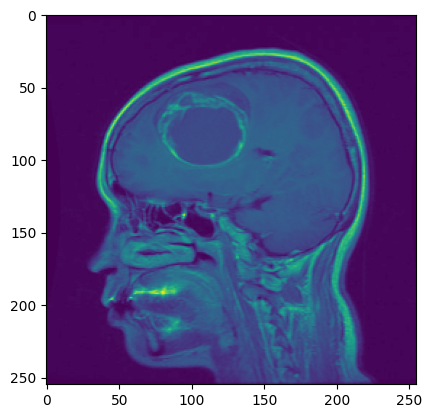

In [7]:
plt.imshow(X_train[0])


2
